In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

Define the function to do the regression, in this case the input will either be the past x coordenates or the past y coordenates, therefore two regressions must be done. Time delta is the input that will be used to create the corresponding x axis value, starting from t=0 to t=N x time delta, being N the amount of measurements used in the regression.

In [2]:
def calculatePath (points, timeDelta):
    pointArray = np.array([])

    for point in points:
        pointArray = np.append(pointArray, point)
    
    timeArray = np.arange(0, timeDelta*len(points), timeDelta)
    timeArray = timeArray.reshape(-1, 1) #must be reshaped, otherwise the regression can't be done
    
    model = LinearRegression().fit(timeArray, pointArray)

    return model.coef_, model.intercept_

Define the function to obtain discrete future position values using the coefficiets and intercept obtained from the regression.
This function will also have to be called twice and will return the following M values of X or Y in a list; M will depend on the timeToPredict value, which will define how long in the future we want to predict. The more time the more points will have to be compared and more likely is the trajectory to change as well.

In [3]:
def predictNextPositions (points, coefficients, intercept, timeDelta, timeToPredict):
    predictedPoints = [] #Empty list where the future X or Y values will be stored
    timeValue = (len(points)-1)*timeDelta #Time value of the last known point assuming first element of the list points is in t=0
    finalTimeToPredict = timeValue+timeToPredict #Calculate the time value for the last point that is gonna be predicted
    
    while timeValue < finalTimeToPredict:
        timeValue = timeValue+timeDelta
        predictedPoints.append(timeValue*coefficients[0]+intercept)
    
    return predictedPoints

Once the next positions have been predicted, the euclidean distance among the points with same time stamp must be calculated.

In [4]:
def euclideanDistance (x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

Points for the euclidean distance function must be obtained. Those points have to be taken from the prediction array, and using them if the distance among some of them is smaller than a given vallue, the time to collision will be calculated based on the index of those numbers. The comparison will be done among not only the points with the same index, but a time margin will be defined, therefore every index withing that time margin will have to be checked.

In [5]:
def timeToCollision (predictedX1, predictedY1, predictedX2, predictedY2, timeMargin, timeDelta, minimumEuclideanDistance): #timeMargin will define points with how many time diff are checked
    index = 0 #to iterate in the lists
    
    while index < len (predictedX1):
        
        maxAddition = int(timeMargin/timeDelta) # maxAddition will show the amount of indexes that need to be compared 
        addition = -maxAddition
        
        while addition <= maxAddition:
            if index + addition >= 0 and index + addition < len(predictedX1): # negative indexes do not exist and the length can't be exceded
                distanceAmongPoints = euclideanDistance(predictedX1[index], predictedY1[index], predictedX2[index+addition], predictedY2[index+addition])
            
                if distanceAmongPoints <= minimumEuclideanDistance:
                    if addition+index <= index: # we will always return the most critical time to collision
                        return (addition+index+1)*timeDelta #1 is added because collision in index = 0 means collision in t = timeDelta
                    else:
                        return (index+1)*timeDelta
                else:
                    pass #when the euclidean distance is greater than the defined minimum no actions needed
            else:
                pass #we will pass when the index is negative or the index is greater than the length of the list
            
            addition = addition+1
        index = index+1
    return -1 #-1 means no collision danger

# Test 1:

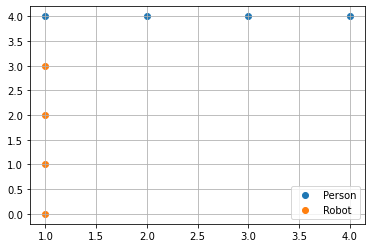

In [6]:
robotX = [1, 1, 1, 1]
robotY = [0, 1, 2, 3]

personX = [1, 2, 3, 4]
personY = [4, 4, 4, 4]

timeBetweenSamples = 0.25

robotXCoef, robotXinter = calculatePath (robotX, timeBetweenSamples)
robotYCoef, robotYinter = calculatePath (robotY, timeBetweenSamples)

personXCoef, personXinter = calculatePath (personX, timeBetweenSamples)
personYCoef, personYinter = calculatePath (personY, timeBetweenSamples)

predictedRobotX = predictNextPositions (robotX, robotXCoef, robotXinter, timeBetweenSamples, 2)
predictedRobotY = predictNextPositions (robotY, robotYCoef, robotYinter, timeBetweenSamples, 2)

predictedPersonX = predictNextPositions (personX, personXCoef, personXinter, timeBetweenSamples, 2)
predictedPersonY = predictNextPositions (personY, personYCoef, personYinter, timeBetweenSamples, 2)

plt.figure()
plt.grid("True")
plt.scatter(personX, personY, label= "Person")
plt.scatter(robotX, robotY, label= "Robot")
plt.legend()
plt.show()


In [7]:
robotXCoef

array([0.])

In [8]:
robotXinter

1.0

In [9]:
robotYCoef

array([4.])

In [10]:
robotYinter

0.0

In [11]:
print(predictedRobotX)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [12]:
print(predictedRobotY)

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]


In [13]:
print(predictedPersonX)

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]


In [14]:
print(predictedPersonY)

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


In [15]:
collisionTime = timeToCollision(predictedRobotX, predictedRobotY, predictedPersonX, predictedPersonY, 1, timeBetweenSamples, 1)

In [16]:
collisionTime

-1

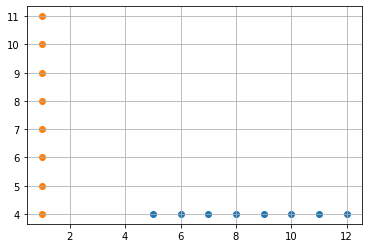

In [17]:
plt.figure()
plt.grid("True")
plt.scatter(predictedPersonX, predictedPersonY, label= "Person")
plt.scatter(predictedRobotX, predictedRobotY, label= "Robot")
plt.show()

# Test 2:

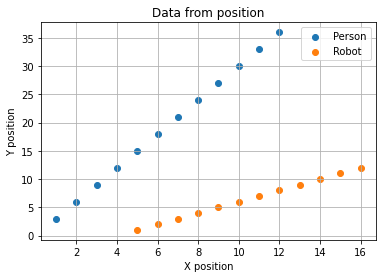

In [18]:
personX = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
personY = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
robotX = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
robotY = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.figure()
plt.grid("True")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Data from position")
plt.scatter(personX, personY, label="Person")
plt.scatter(robotX, robotY, label="Robot")
plt.legend()
plt.show()

timeBetweenSamples = 0.25

robotXCoef, robotXinter = calculatePath (robotX, timeBetweenSamples)
robotYCoef, robotYinter = calculatePath (robotY, timeBetweenSamples)

personXCoef, personXinter = calculatePath (personX, timeBetweenSamples)
personYCoef, personYinter = calculatePath (personY, timeBetweenSamples)

predictedRobotX = predictNextPositions (robotX, robotXCoef, robotXinter, timeBetweenSamples, 2)
predictedRobotY = predictNextPositions (robotY, robotYCoef, robotYinter, timeBetweenSamples, 2)

predictedPersonX = predictNextPositions (personX, personXCoef, personXinter, timeBetweenSamples, 2)
predictedPersonY = predictNextPositions (personY, personYCoef, personYinter, timeBetweenSamples, 2)


In [19]:
robotXCoef

array([4.])

In [20]:
robotXinter

5.000000000000003

In [21]:
robotYCoef

array([4.])

In [22]:
robotYinter

1.0000000000000027

In [23]:
print(predictedRobotX)

[16.999999999999996, 17.999999999999996, 18.999999999999996, 19.999999999999996, 20.999999999999996, 21.999999999999996, 22.999999999999996, 23.999999999999996]


In [24]:
print(predictedRobotY)

[12.999999999999996, 13.999999999999996, 14.999999999999996, 15.999999999999996, 16.999999999999996, 17.999999999999996, 18.999999999999996, 19.999999999999996]


In [25]:
print(predictedPersonX)

[12.999999999999996, 13.999999999999996, 14.999999999999996, 15.999999999999996, 16.999999999999996, 17.999999999999996, 18.999999999999996, 19.999999999999996]


In [26]:
print(predictedPersonY)

[38.99999999999999, 41.99999999999999, 44.999999999999986, 47.999999999999986, 50.999999999999986, 53.999999999999986, 56.999999999999986, 59.99999999999998]


In [27]:
collisionTime = timeToCollision(predictedRobotX, predictedRobotY, predictedPersonX, predictedPersonY, 1, timeBetweenSamples, 1)

In [28]:
collisionTime

-1

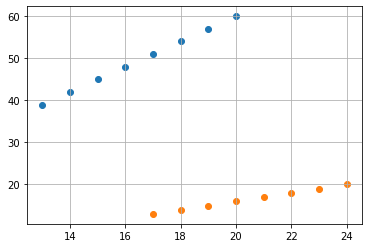

In [29]:
plt.figure()
plt.grid("True")
plt.scatter(predictedPersonX, predictedPersonY, label= "Person")
plt.scatter(predictedRobotX, predictedRobotY, label= "Robot")
plt.show()

# Test 3:

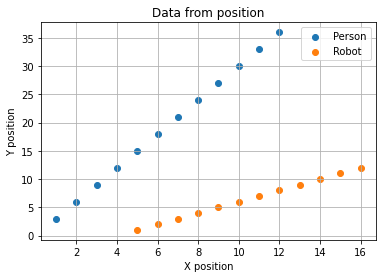

In [30]:
personX = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
personY = [36, 33, 30, 27, 24, 21, 18, 15, 12, 9, 6, 3]
robotX = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5]
robotY = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

plt.figure()
plt.grid("True")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Data from position")
plt.scatter(personX, personY, label="Person")
plt.scatter(robotX, robotY, label="Robot")
plt.legend()
plt.show()

timeBetweenSamples = 0.25

robotXCoef, robotXinter = calculatePath (robotX, timeBetweenSamples)
robotYCoef, robotYinter = calculatePath (robotY, timeBetweenSamples)

personXCoef, personXinter = calculatePath (personX, timeBetweenSamples)
personYCoef, personYinter = calculatePath (personY, timeBetweenSamples)

predictedRobotX = predictNextPositions (robotX, robotXCoef, robotXinter, timeBetweenSamples, 2)
predictedRobotY = predictNextPositions (robotY, robotYCoef, robotYinter, timeBetweenSamples, 2)

predictedPersonX = predictNextPositions (personX, personXCoef, personXinter, timeBetweenSamples, 2)
predictedPersonY = predictNextPositions (personY, personYCoef, personYinter, timeBetweenSamples, 2)

In [31]:
robotXCoef

array([-4.])

In [32]:
robotXinter

15.999999999999996

In [33]:
robotYCoef

array([-4.])

In [34]:
robotYinter

11.999999999999996

In [35]:
print(predictedRobotX)

[4.000000000000002, 3.0000000000000018, 2.0000000000000036, 1.0000000000000036, 3.552713678800501e-15, -0.9999999999999964, -1.9999999999999964, -2.9999999999999964]


In [36]:
print(predictedRobotY)

[1.7763568394002505e-15, -0.9999999999999982, -1.9999999999999964, -2.9999999999999964, -3.9999999999999964, -4.9999999999999964, -5.9999999999999964, -6.9999999999999964]


In [37]:
print(predictedPersonX)

[1.7763568394002505e-15, -0.9999999999999982, -1.9999999999999964, -2.9999999999999964, -3.9999999999999964, -4.9999999999999964, -5.9999999999999964, -6.9999999999999964]


In [38]:
print(predictedPersonY)

[7.105427357601002e-15, -2.999999999999993, -5.999999999999986, -8.999999999999986, -11.999999999999986, -14.999999999999986, -17.999999999999986, -20.99999999999998]


In [39]:
collisionTime = timeToCollision(predictedRobotX, predictedRobotY, predictedPersonX, predictedPersonY, 1, timeBetweenSamples, 1)

In [40]:
collisionTime

0.75

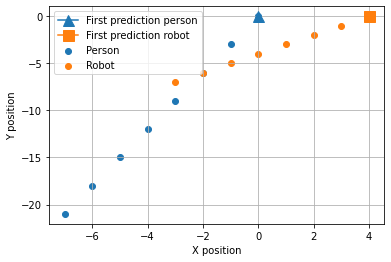

In [41]:
plt.figure()
plt.grid("True")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.plot(predictedPersonX[0], predictedPersonY[0], label="First prediction person", marker = "^", markersize = "11")
plt.plot(predictedRobotX[0], predictedRobotY[0], label="First prediction robot", marker = "s", markersize = "11")
plt.scatter(predictedPersonX, predictedPersonY, label= "Person")
plt.scatter(predictedRobotX, predictedRobotY, label= "Robot")
plt.legend()
plt.show()

# Test 4:

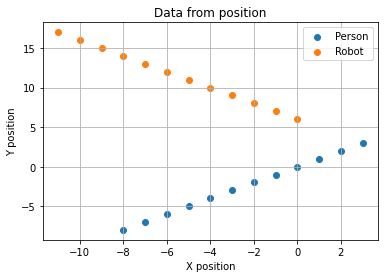

In [42]:
personX = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3]
personY = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3]
robotX = [-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
robotY = [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]

plt.figure()
plt.grid("True")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Data from position")
plt.scatter(personX, personY, label="Person")
plt.scatter(robotX, robotY, label="Robot")
plt.legend()
plt.show()

timeBetweenSamples = 0.25

robotXCoef, robotXinter = calculatePath (robotX, timeBetweenSamples)
robotYCoef, robotYinter = calculatePath (robotY, timeBetweenSamples)

personXCoef, personXinter = calculatePath (personX, timeBetweenSamples)
personYCoef, personYinter = calculatePath (personY, timeBetweenSamples)

predictedRobotX = predictNextPositions (robotX, robotXCoef, robotXinter, timeBetweenSamples, 2)
predictedRobotY = predictNextPositions (robotY, robotYCoef, robotYinter, timeBetweenSamples, 2)

predictedPersonX = predictNextPositions (personX, personXCoef, personXinter, timeBetweenSamples, 2)
predictedPersonY = predictNextPositions (personY, personYCoef, personYinter, timeBetweenSamples, 2)

In [43]:
robotXCoef

array([4.])

In [44]:
robotXinter

-10.999999999999996

In [45]:
robotYCoef

array([-4.])

In [46]:
robotYinter

16.999999999999996

In [47]:
print(predictedRobotX)

[0.9999999999999982, 1.9999999999999982, 2.9999999999999964, 3.9999999999999964, 4.9999999999999964, 5.9999999999999964, 6.9999999999999964, 7.9999999999999964]


In [48]:
print(predictedRobotY)

[5.000000000000002, 4.000000000000002, 3.0000000000000036, 2.0000000000000036, 1.0000000000000036, 3.552713678800501e-15, -0.9999999999999964, -1.9999999999999964]


In [49]:
print(predictedPersonX)

[3.9999999999999973, 4.999999999999997, 5.999999999999996, 6.999999999999996, 7.999999999999996, 8.999999999999996, 9.999999999999996, 10.999999999999996]


In [50]:
print(predictedPersonY)

[3.9999999999999973, 4.999999999999997, 5.999999999999996, 6.999999999999996, 7.999999999999996, 8.999999999999996, 9.999999999999996, 10.999999999999996]


In [54]:
collisionTime = timeToCollision(predictedRobotX, predictedRobotY, predictedPersonX, predictedPersonY, 1, timeBetweenSamples, 2)

In [55]:
collisionTime

0.25

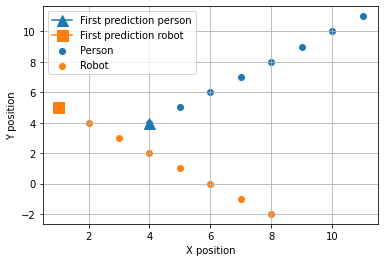

In [53]:
plt.figure()
plt.grid("True")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.plot(predictedPersonX[0], predictedPersonY[0], label="First prediction person", marker = "^", markersize = "11")
plt.plot(predictedRobotX[0], predictedRobotY[0], label="First prediction robot", marker = "s", markersize = "11")
plt.scatter(predictedPersonX, predictedPersonY, label= "Person")
plt.scatter(predictedRobotX, predictedRobotY, label= "Robot")
plt.legend()
plt.show()